Text(0.5, 1.0, 'Cell boundary and force points')

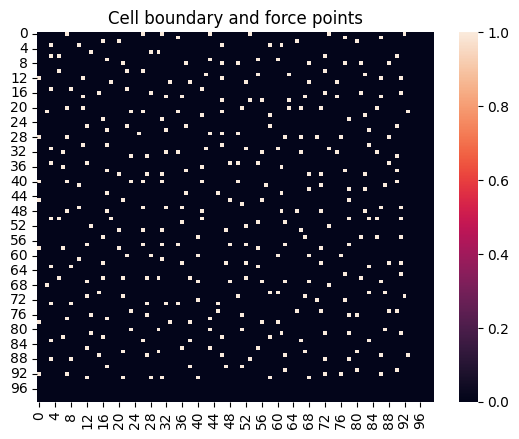

In [2]:
import beads_generator
import seaborn as sns
import matplotlib.pyplot as plt

random_beads = beads_generator.create_random_bead(100, 20)
ax = sns.heatmap(random_beads)
plt.title("Cell boundary and force points")


Generating mock bead images...
Image generation complete.
Starting DIC analysis with 81 subsets...

--- Calculated Displacement Field Array (Sample) ---
Columns: [Y_center, X_center, U_displacement (x), V_displacement (y)]
[[15.         15.          2.51017187  1.68090092]
 [15.         35.          2.4887446   1.71191265]
 [15.         55.          2.50882898  1.77047543]
 [15.         75.          2.51983601  1.70847066]
 [15.         95.          2.50551565  1.69659572]]
...
--------------------------------------------------
Mean Displacement U: 2.504
Mean Displacement V: 1.721
Applied Displacement: U=2.5, V=1.8
Mean Squared Error (MSE) in displacement: 0.0085 pixels^2
--------------------------------------------------


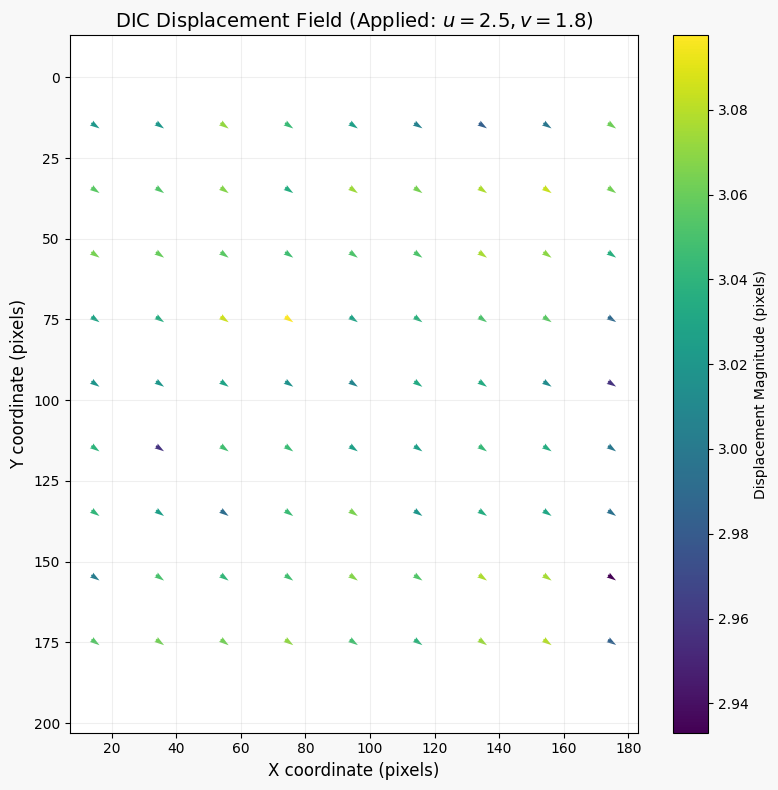

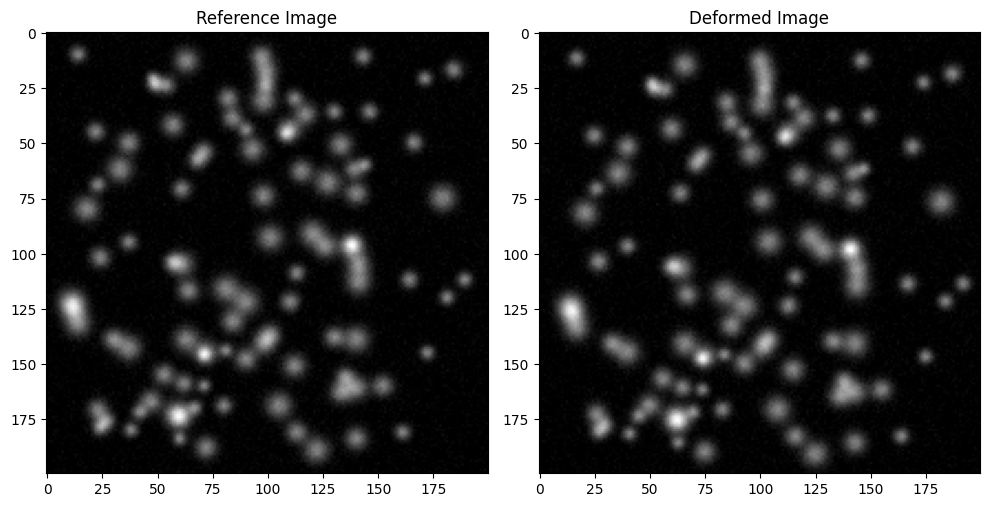

In [ ]:
from bead_detection import bead_image_correlation, plot_displacement_field, generate_mock_bead_image
import matplotlib.pyplot as plt

# --- Main Execution Block ---
if __name__ == "__main__":
    # Constants
    SUBSET_SIZE = 31  # Must be odd
    GRID_SPACING = 20
    IMAGE_SIZE = 200

    # 1. Define Applied Displacement
    APPLIED_DX = 2.5  # True displacement in X (columns)
    APPLIED_DY = 1.8  # True displacement in Y (rows)

    # 2. Generate Mock Images (Ref and Def)
    print("Generating mock bead images...")
    reference_image = generate_mock_bead_image(IMAGE_SIZE, num_beads=100, noise_level=0.02, dx=0.0, dy=0.0)
    deformed_image = generate_mock_bead_image(IMAGE_SIZE, num_beads=100, noise_level=0.02, dx=APPLIED_DX, dy=APPLIED_DY)
    print("Image generation complete.")

    # 3. Perform DIC
    try:
        displacement_field_array = bead_image_correlation(
            reference_image, 
            deformed_image, 
            subset_size=SUBSET_SIZE, 
            grid_spacing=GRID_SPACING
        )
        print("displacement_field_array dimensions ", displacement_field_array.shape)

        # 4. Output the Result
        print("\n--- Calculated Displacement Field Array (Sample) ---")
        print("Columns: [Y_center, X_center, U_displacement (x), V_displacement (y)]")
        print(displacement_field_array[:5]) # Print first 5 rows
        print("...")

        # 5. Visualize the Results
        plot_displacement_field(displacement_field_array, IMAGE_SIZE, APPLIED_DX, APPLIED_DY)

    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred during correlation: {e}")
        
    # Plotting the raw images for context
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(reference_image, cmap='gray')
    axes[0].set_title("Reference Image")
    axes[1].imshow(deformed_image, cmap='gray')
    axes[1].set_title("Deformed Image")
    plt.tight_layout()
    plt.show()
